In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import clean_columns
from scipy import stats

# New York

In [176]:
ny_sites = {"Pre Emption":"Y1", 
            "Abbott":"Y2",
            "Emmi":"Y3",
            "G&S Orchards":"Y4",
            "Berry Patch":"Y5"}

In [177]:
swd_ny = pd.read_csv('Data/swd_ny.csv')
swd_ny = clean_columns(swd_ny)
swd_ny["collection_date"] = pd.to_datetime(swd_ny["collection_date"], format='mixed')

swd_ny

,site,collection_date,fruit,mean_gps_long,mean_gps_lat,sum_#_berries,n_sample_#,sum_frt_w_g,sum_fem_swd,sum_male_swd,sum_male_lj,sum_fem_lj,sum_male_gk,sum_fem_gk,sum_other,notes
0,Abbott,2024-06-26,Blueberry,43.134334,-76.280247,125.0,5,222.1,0.0,0.0,0,0,0,0,0,NaN
1,Abbott,2024-06-26,Honey suckle,43.134334,-76.280247,500.0,5,197.0,0.0,0.0,0,0,0,0,0,NaN
2,Abbott,2024-07-25,Blueberry,43.134334,-76.280247,125.0,5,268.0,81.0,73.0,0,0,0,0,0,NaN
3,Abbott,2024-07-25,Honey suckle,43.134334,-76.280247,500.0,5,159.5,334.0,276.0,3,0,0,0,0,NaN
4,Abbott,2024-09-04,Buckthorn,43.134334,-76.280247,500.0,5,181.9,18.0,11.0,1,2,0,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Emmi,2022-09-20,Sentinel,43.173433,-76.401175,NaN,6,NaN,32.0,19.0,8,5,0,0,0,NaN
57,G&S Orchards,2022-09-20,Sentinel,43.168194,-77.331758,NaN,6,NaN,13.0,5.0,6,26,0,0,0,NaN
58,Pre Emption,2022-09-20,Buckthorn,42.793386,-77.133892,500.0,5,NaN,0.0,1.0,0,0,0,0,0,NaN
59,Abbott,2022-09-20,Buckthorn,43.134334,-76.280247,500.0,5,NaN,16.0,11.0,4,8,0,1,0,NaN


In [178]:
swd_ny['site_code'] = swd_ny['site'].map(ny_sites).fillna('')
swd_ny

,site,collection_date,fruit,mean_gps_long,mean_gps_lat,sum_#_berries,n_sample_#,sum_frt_w_g,sum_fem_swd,sum_male_swd,sum_male_lj,sum_fem_lj,sum_male_gk,sum_fem_gk,sum_other,notes,site_code
0,Abbott,2024-06-26,Blueberry,43.134334,-76.280247,125.0,5,222.1,0.0,0.0,0,0,0,0,0,NaN,Y2
1,Abbott,2024-06-26,Honey suckle,43.134334,-76.280247,500.0,5,197.0,0.0,0.0,0,0,0,0,0,NaN,Y2
2,Abbott,2024-07-25,Blueberry,43.134334,-76.280247,125.0,5,268.0,81.0,73.0,0,0,0,0,0,NaN,Y2
3,Abbott,2024-07-25,Honey suckle,43.134334,-76.280247,500.0,5,159.5,334.0,276.0,3,0,0,0,0,NaN,Y2
4,Abbott,2024-09-04,Buckthorn,43.134334,-76.280247,500.0,5,181.9,18.0,11.0,1,2,0,2,0,NaN,Y2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Emmi,2022-09-20,Sentinel,43.173433,-76.401175,NaN,6,NaN,32.0,19.0,8,5,0,0,0,NaN,Y3
57,G&S Orchards,2022-09-20,Sentinel,43.168194,-77.331758,NaN,6,NaN,13.0,5.0,6,26,0,0,0,NaN,Y4
58,Pre Emption,2022-09-20,Buckthorn,42.793386,-77.133892,500.0,5,NaN,0.0,1.0,0,0,0,0,0,NaN,Y1
59,Abbott,2022-09-20,Buckthorn,43.134334,-76.280247,500.0,5,NaN,16.0,11.0,4,8,0,1,0,NaN,Y2


In [179]:
cdl_ny = pd.read_csv('Landscape/CDL/2023_ny_cdl_500m.csv')
cdl_ny = clean_columns(cdl_ny)
cdl_ny

,unnamed_0,name,corn,sorghum,soybeans,sunflower,sweet_corn,barley,winter_wheat,rye,...,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer
0,0,Y1,437,0,101,0,0,0,605,0,...,0.155998,63,0.039155,6,0.003729,0,0.000000,0.137974,0.195152,500
1,1,Y2,915,0,34,0,0,2,7,0,...,0.129231,287,0.176615,130,0.080000,0,0.000000,0.107077,0.305846,500
2,2,Y3,193,18,105,2,21,2,38,0,...,0.340700,374,0.229589,189,0.116022,0,0.000000,0.291590,0.570289,500
3,3,Y4,59,0,165,0,1,0,30,0,...,0.237101,668,0.410319,40,0.024570,0,0.000000,0.153563,0.647420,500
4,4,Y5,87,0,7,0,3,0,9,45,...,0.418386,519,0.324578,132,0.082552,1,0.000625,0.333959,0.742964,500


In [180]:
swd_ny = pd.merge(swd_ny, cdl_ny, how='left', left_on='site_code', right_on='name')
swd_ny

,site,collection_date,fruit,mean_gps_long,mean_gps_lat,sum_#_berries,n_sample_#,sum_frt_w_g,sum_fem_swd,sum_male_swd,...,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer
0,Abbott,2024-06-26,Blueberry,43.134334,-76.280247,125.0,5,222.1,0.0,0.0,...,0.129231,287,0.176615,130,0.080000,0,0.0,0.107077,0.305846,500
1,Abbott,2024-06-26,Honey suckle,43.134334,-76.280247,500.0,5,197.0,0.0,0.0,...,0.129231,287,0.176615,130,0.080000,0,0.0,0.107077,0.305846,500
2,Abbott,2024-07-25,Blueberry,43.134334,-76.280247,125.0,5,268.0,81.0,73.0,...,0.129231,287,0.176615,130,0.080000,0,0.0,0.107077,0.305846,500
3,Abbott,2024-07-25,Honey suckle,43.134334,-76.280247,500.0,5,159.5,334.0,276.0,...,0.129231,287,0.176615,130,0.080000,0,0.0,0.107077,0.305846,500
4,Abbott,2024-09-04,Buckthorn,43.134334,-76.280247,500.0,5,181.9,18.0,11.0,...,0.129231,287,0.176615,130,0.080000,0,0.0,0.107077,0.305846,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Emmi,2022-09-20,Sentinel,43.173433,-76.401175,NaN,6,NaN,32.0,19.0,...,0.340700,374,0.229589,189,0.116022,0,0.0,0.291590,0.570289,500
57,G&S Orchards,2022-09-20,Sentinel,43.168194,-77.331758,NaN,6,NaN,13.0,5.0,...,0.237101,668,0.410319,40,0.024570,0,0.0,0.153563,0.647420,500
58,Pre Emption,2022-09-20,Buckthorn,42.793386,-77.133892,500.0,5,NaN,0.0,1.0,...,0.155998,63,0.039155,6,0.003729,0,0.0,0.137974,0.195152,500
59,Abbott,2022-09-20,Buckthorn,43.134334,-76.280247,500.0,5,NaN,16.0,11.0,...,0.129231,287,0.176615,130,0.080000,0,0.0,0.107077,0.305846,500


In [181]:
swd_ny['swd_sum'] = swd_ny['sum_fem_swd'] + swd_ny['sum_male_swd']
swd_ny['lj_sum'] = swd_ny['sum_fem_lj'] + swd_ny['sum_male_lj']
swd_ny['gk_sum'] = swd_ny['sum_fem_gk'] + swd_ny['sum_male_gk']
swd_ny = swd_ny.dropna(subset = ['swd_sum', 'lj_sum', 'gk_sum'])
swd_ny

,site,collection_date,fruit,mean_gps_long,mean_gps_lat,sum_#_berries,n_sample_#,sum_frt_w_g,sum_fem_swd,sum_male_swd,...,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum
0,Abbott,2024-06-26,Blueberry,43.134334,-76.280247,125.0,5,222.1,0.0,0.0,...,130,0.080000,0,0.000000,0.107077,0.305846,500,0.0,0,0
1,Abbott,2024-06-26,Honey suckle,43.134334,-76.280247,500.0,5,197.0,0.0,0.0,...,130,0.080000,0,0.000000,0.107077,0.305846,500,0.0,0,0
2,Abbott,2024-07-25,Blueberry,43.134334,-76.280247,125.0,5,268.0,81.0,73.0,...,130,0.080000,0,0.000000,0.107077,0.305846,500,154.0,0,0
3,Abbott,2024-07-25,Honey suckle,43.134334,-76.280247,500.0,5,159.5,334.0,276.0,...,130,0.080000,0,0.000000,0.107077,0.305846,500,610.0,3,0
4,Abbott,2024-09-04,Buckthorn,43.134334,-76.280247,500.0,5,181.9,18.0,11.0,...,130,0.080000,0,0.000000,0.107077,0.305846,500,29.0,3,2
5,Berry Patch,2024-06-26,Bush Cherry,42.527522,-73.357818,50.0,1,64.5,14.0,12.0,...,132,0.082552,1,0.000625,0.333959,0.742964,500,26.0,9,0
6,Berry Patch,2024-06-26,Service Berry,42.527522,-73.357818,250.0,5,167.8,140.0,154.0,...,132,0.082552,1,0.000625,0.333959,0.742964,500,294.0,1,0
7,Berry Patch,2024-07-25,Honeysuckle,42.527522,-73.357818,500.0,5,139.3,114.0,100.0,...,132,0.082552,1,0.000625,0.333959,0.742964,500,214.0,109,0
8,Emmi,2024-06-26,Blueberry,43.173433,-76.401175,125.0,5,214.0,0.0,0.0,...,189,0.116022,0,0.000000,0.291590,0.570289,500,0.0,0,0
9,Emmi,2024-06-26,Honeysuckle,43.173433,-76.401175,500.0,5,137.7,12.0,5.0,...,189,0.116022,0,0.000000,0.291590,0.570289,500,17.0,0,0


<Axes: xlabel='site'>

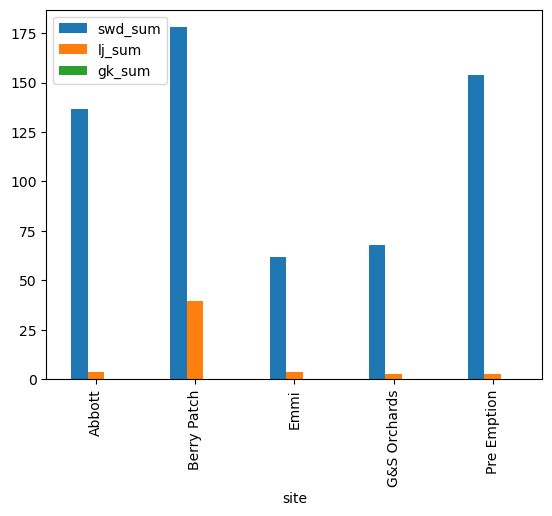

In [182]:
swd_ny.groupby(by = "site")[['swd_sum', 'lj_sum', 'gk_sum']].mean().plot(kind = "bar")


<Axes: xlabel='swd_sum', ylabel='lj_sum'>

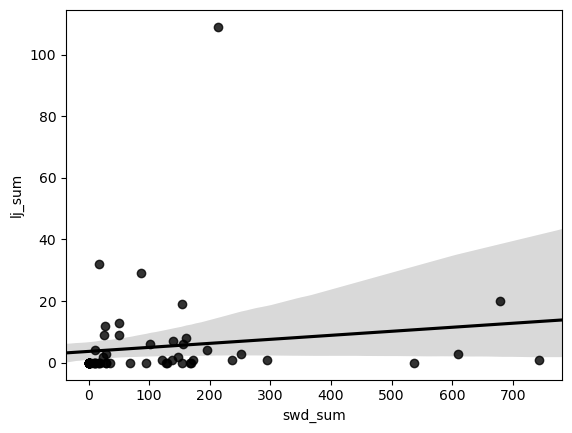

In [183]:
sns.regplot(
    data=swd_ny, x="swd_sum", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [184]:
stats.pearsonr(swd_ny['swd_sum'], swd_ny['lj_sum'])

PearsonRResult(statistic=0.1412124514418959, pvalue=0.28182832061982777)

<Axes: xlabel='forest_prop', ylabel='lj_sum'>

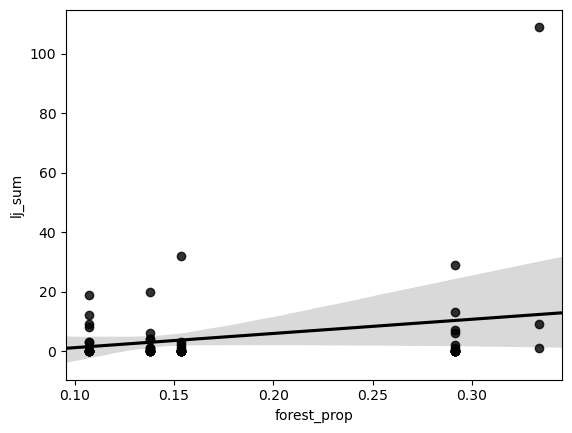

In [185]:
sns.regplot(
    data=swd_ny, x="forest_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [186]:
stats.pearsonr(swd_ny['forest_prop'], swd_ny['lj_sum'])

PearsonRResult(statistic=0.24715274370420887, pvalue=0.05693418847194535)

# New Jersey

In [187]:
swd_nj = pd.read_csv('Data/swd_nj.csv')
swd_nj = clean_columns(swd_nj)
swd_nj["collection_date"] = pd.to_datetime(swd_nj["collection_date"], format='mixed')

swd_nj

,collection_date,country_ocean,farm,state_province,latitude,longitude,type_of_collection_select_from_the_menu,host_plant,n_of_subsample_if_any,sample_weight_gr,swd_pupae,swd,l_japonica,g_kimorum,other_parasitoids,other_drosophilid_pupae,other_drosophilid,l_japonica_1,other_parasitoids_1,notes_if_any
0,2024-06-11,USA,Denny Doyle,New Jersey,"39° 57' 911""N","74° 39' 985""W",Fruit from plant,Highbush Blueberry,NaN,6.8,NaN,0,0,0,0,0,0,0,0,NaN
1,2024-06-11,USA,Denny Doyle,New Jersey,"39° 56' 396""N","74°36'979""W",Fruit from plant,Highbush Blueberry,NaN,21.9,NaN,0,0,0,0,0,0,0,0,NaN
2,2024-06-11,USA,Denny Doyle,New Jersey,"39° 55' 135""N","74° 39' 341""W",Fruit from plant,Highbush Blueberry,NaN,7.9,NaN,0,0,0,0,0,0,0,0,NaN
3,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 780""N","74° 38' 054""W",Fruit from plant,Highbush Blueberry,NaN,5.8,NaN,0,0,0,0,0,0,0,0,NaN
4,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 939""N","74° 37' 754""W",Fruit from plant,Highbush Blueberry,NaN,7.0,NaN,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2024-10-24,USA,Macrie - 206,New Jersey,"39°42'223""N","74°45'682""W",Fruit from plant,Cranberry,NaN,19.7,NaN,0,0,0,0,0,0,0,0,NaN
623,2024-10-24,USA,Macrie - 206,New Jersey,"39°42'227""N","74°45'640""W",Fruit from plant,Pokeweed,NaN,4.9,NaN,0,0,0,0,0,0,0,0,NaN
624,2024-10-24,USA,Moore's Meadows,New Jersey,"39°49'175""N","74°38'060""W",Fruit from plant,Wintergreen,NaN,5.6,NaN,0,0,0,0,0,0,0,0,NaN
625,2024-10-24,USA,Moore's Meadows,New Jersey,"39°49'096""N","74°38'300""W",Fruit from plant,Inkberry,NaN,19.0,NaN,0,0,0,0,0,0,0,0,NaN


In [188]:
swd_nj.loc[swd_nj['farm'].str.contains('mays', case=False), 'farm'] = 'ABC Mays Landing'
swd_nj.loc[swd_nj['farm'].str.contains('abc', case=False), 'farm'] = 'ABC Home'
swd_nj.loc[swd_nj['farm'].str.contains('miller', case=False), 'farm'] = 'Miller Farms'
swd_nj.loc[swd_nj['farm'].str.contains('haines', case=False), 'farm'] = 'Haines Berry Farm'
swd_nj.loc[swd_nj['farm'].str.contains('buck', case=False), 'farm'] = 'Big Buck Farms'
swd_nj.loc[swd_nj['farm'].str.contains('macrie', case=False), 'farm'] = 'Macrie Brothers'
swd_nj.loc[swd_nj['farm'].str.contains('moore', case=False), 'farm'] = 'Moore Farms'
swd_nj.loc[swd_nj['farm'].str.contains('macrie', case=False), 'farm'] = 'Macrie Brothers'
swd_nj.loc[swd_nj['farm'].str.contains('variety', case=False), 'farm'] = 'Variety Farms Inc'
swd_nj.loc[swd_nj['farm'].str.contains('whalen', case=False), 'farm'] = 'Whalens Blueberry Farm'


In [189]:
nj_sites = {"Variety Farms Inc":"J1", 
            "Moore Farms":"J2",
            "Big Buck Farms":"J3",
            "Denny Doyle":"J4",
            "Macrie Brothers":"J5",
            "ABC Home":"J6", 
            "ABC Mays Landing":"J7",
            "Haines Berry Farm":"J8",
            "Miller Farms":"J9",
            "Whalens Blueberry Farm":"J10"}

In [190]:
swd_nj['site_code'] = swd_nj['farm'].map(nj_sites).fillna('')
swd_nj

,collection_date,country_ocean,farm,state_province,latitude,longitude,type_of_collection_select_from_the_menu,host_plant,n_of_subsample_if_any,sample_weight_gr,...,swd,l_japonica,g_kimorum,other_parasitoids,other_drosophilid_pupae,other_drosophilid,l_japonica_1,other_parasitoids_1,notes_if_any,site_code
0,2024-06-11,USA,Denny Doyle,New Jersey,"39° 57' 911""N","74° 39' 985""W",Fruit from plant,Highbush Blueberry,NaN,6.8,...,0,0,0,0,0,0,0,0,NaN,J4
1,2024-06-11,USA,Denny Doyle,New Jersey,"39° 56' 396""N","74°36'979""W",Fruit from plant,Highbush Blueberry,NaN,21.9,...,0,0,0,0,0,0,0,0,NaN,J4
2,2024-06-11,USA,Denny Doyle,New Jersey,"39° 55' 135""N","74° 39' 341""W",Fruit from plant,Highbush Blueberry,NaN,7.9,...,0,0,0,0,0,0,0,0,NaN,J4
3,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 780""N","74° 38' 054""W",Fruit from plant,Highbush Blueberry,NaN,5.8,...,0,0,0,0,0,0,0,0,NaN,J8
4,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 939""N","74° 37' 754""W",Fruit from plant,Highbush Blueberry,NaN,7.0,...,0,0,0,0,0,0,0,0,NaN,J8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2024-10-24,USA,Macrie Brothers,New Jersey,"39°42'223""N","74°45'682""W",Fruit from plant,Cranberry,NaN,19.7,...,0,0,0,0,0,0,0,0,NaN,J5
623,2024-10-24,USA,Macrie Brothers,New Jersey,"39°42'227""N","74°45'640""W",Fruit from plant,Pokeweed,NaN,4.9,...,0,0,0,0,0,0,0,0,NaN,J5
624,2024-10-24,USA,Moore Farms,New Jersey,"39°49'175""N","74°38'060""W",Fruit from plant,Wintergreen,NaN,5.6,...,0,0,0,0,0,0,0,0,NaN,J2
625,2024-10-24,USA,Moore Farms,New Jersey,"39°49'096""N","74°38'300""W",Fruit from plant,Inkberry,NaN,19.0,...,0,0,0,0,0,0,0,0,NaN,J2


In [191]:
cdl_nj = pd.read_csv('Landscape/CDL/2023_nj_cdl_500m.csv')
cdl_nj = clean_columns(cdl_nj)
cdl_nj

,unnamed_0,name,corn,sorghum,soybeans,sweet_corn,winter_wheat,dbl_crop_win_wht_soybeans,rye,millet,...,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer
0,0,J1,4,0,0,0,0,0,0,0,...,0.522603,0,0.000000,0,0.000000,0,0.000000,0.180137,0.522603,500
1,1,J2,3,2,30,0,0,2,0,0,...,0.654397,7,0.004772,132,0.089980,95,0.064758,0.209952,0.659168,500
2,2,J3,4,1,2,0,0,0,0,0,...,0.820355,5,0.003415,83,0.056694,1,0.000683,0.319672,0.823770,500
3,3,J4,2,0,4,0,0,2,0,0,...,0.849593,16,0.010840,85,0.057588,1,0.000678,0.170732,0.860434,500
4,4,J5,13,0,14,0,4,0,0,0,...,0.698217,10,0.006859,180,0.123457,3,0.002058,0.225652,0.705075,500
5,5,J6,49,2,110,0,4,4,3,4,...,0.493852,37,0.025273,54,0.036885,2,0.001366,0.079918,0.519126,500
6,6,J7,17,4,28,0,0,2,0,3,...,0.746064,22,0.015058,173,0.118412,0,0.000000,0.169747,0.761123,500
7,7,J8,0,0,21,0,0,0,0,0,...,0.685386,8,0.005413,35,0.023681,110,0.074425,0.037889,0.690798,500
8,8,J9,0,0,26,2,0,0,2,0,...,0.719048,10,0.006803,102,0.069388,1,0.000680,0.327211,0.725850,500
9,9,J10,2,0,11,5,0,0,2,0,...,0.562203,37,0.025153,101,0.068661,4,0.002719,0.413324,0.587356,500


In [192]:
swd_nj = pd.merge(swd_nj, cdl_nj, how='left', left_on='site_code', right_on='name')
swd_nj

,collection_date,country_ocean,farm,state_province,latitude,longitude,type_of_collection_select_from_the_menu,host_plant,n_of_subsample_if_any,sample_weight_gr,...,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer
0,2024-06-11,USA,Denny Doyle,New Jersey,"39° 57' 911""N","74° 39' 985""W",Fruit from plant,Highbush Blueberry,NaN,6.8,...,0.849593,16.0,0.010840,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0
1,2024-06-11,USA,Denny Doyle,New Jersey,"39° 56' 396""N","74°36'979""W",Fruit from plant,Highbush Blueberry,NaN,21.9,...,0.849593,16.0,0.010840,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0
2,2024-06-11,USA,Denny Doyle,New Jersey,"39° 55' 135""N","74° 39' 341""W",Fruit from plant,Highbush Blueberry,NaN,7.9,...,0.849593,16.0,0.010840,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0
3,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 780""N","74° 38' 054""W",Fruit from plant,Highbush Blueberry,NaN,5.8,...,0.685386,8.0,0.005413,35.0,0.023681,110.0,0.074425,0.037889,0.690798,500.0
4,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 939""N","74° 37' 754""W",Fruit from plant,Highbush Blueberry,NaN,7.0,...,0.685386,8.0,0.005413,35.0,0.023681,110.0,0.074425,0.037889,0.690798,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2024-10-24,USA,Macrie Brothers,New Jersey,"39°42'223""N","74°45'682""W",Fruit from plant,Cranberry,NaN,19.7,...,0.698217,10.0,0.006859,180.0,0.123457,3.0,0.002058,0.225652,0.705075,500.0
623,2024-10-24,USA,Macrie Brothers,New Jersey,"39°42'227""N","74°45'640""W",Fruit from plant,Pokeweed,NaN,4.9,...,0.698217,10.0,0.006859,180.0,0.123457,3.0,0.002058,0.225652,0.705075,500.0
624,2024-10-24,USA,Moore Farms,New Jersey,"39°49'175""N","74°38'060""W",Fruit from plant,Wintergreen,NaN,5.6,...,0.654397,7.0,0.004772,132.0,0.089980,95.0,0.064758,0.209952,0.659168,500.0
625,2024-10-24,USA,Moore Farms,New Jersey,"39°49'096""N","74°38'300""W",Fruit from plant,Inkberry,NaN,19.0,...,0.654397,7.0,0.004772,132.0,0.089980,95.0,0.064758,0.209952,0.659168,500.0


In [195]:
swd_nj['swd_sum'] = swd_nj['swd']
swd_nj['lj_sum'] = swd_nj['l_japonica'] 
swd_nj['gk_sum'] = swd_nj['g_kimorum']
#swd_nj = swd_nj.dropna(subset = ['swd_sum', 'lj_sum', 'gk_sum', 'forest_prop'])
swd_nj

,collection_date,country_ocean,farm,state_province,latitude,longitude,type_of_collection_select_from_the_menu,host_plant,n_of_subsample_if_any,sample_weight_gr,...,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum
0,2024-06-11,USA,Denny Doyle,New Jersey,"39° 57' 911""N","74° 39' 985""W",Fruit from plant,Highbush Blueberry,NaN,6.8,...,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0,0,0,0
1,2024-06-11,USA,Denny Doyle,New Jersey,"39° 56' 396""N","74°36'979""W",Fruit from plant,Highbush Blueberry,NaN,21.9,...,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0,0,0,0
2,2024-06-11,USA,Denny Doyle,New Jersey,"39° 55' 135""N","74° 39' 341""W",Fruit from plant,Highbush Blueberry,NaN,7.9,...,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0,0,0,0
3,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 780""N","74° 38' 054""W",Fruit from plant,Highbush Blueberry,NaN,5.8,...,35.0,0.023681,110.0,0.074425,0.037889,0.690798,500.0,0,0,0
4,2024-06-12,USA,Haines Berry Farm,New Jersey,"39° 55' 939""N","74° 37' 754""W",Fruit from plant,Highbush Blueberry,NaN,7.0,...,35.0,0.023681,110.0,0.074425,0.037889,0.690798,500.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2024-10-24,USA,Macrie Brothers,New Jersey,"39°42'223""N","74°45'682""W",Fruit from plant,Cranberry,NaN,19.7,...,180.0,0.123457,3.0,0.002058,0.225652,0.705075,500.0,0,0,0
623,2024-10-24,USA,Macrie Brothers,New Jersey,"39°42'227""N","74°45'640""W",Fruit from plant,Pokeweed,NaN,4.9,...,180.0,0.123457,3.0,0.002058,0.225652,0.705075,500.0,0,0,0
624,2024-10-24,USA,Moore Farms,New Jersey,"39°49'175""N","74°38'060""W",Fruit from plant,Wintergreen,NaN,5.6,...,132.0,0.089980,95.0,0.064758,0.209952,0.659168,500.0,0,0,0
625,2024-10-24,USA,Moore Farms,New Jersey,"39°49'096""N","74°38'300""W",Fruit from plant,Inkberry,NaN,19.0,...,132.0,0.089980,95.0,0.064758,0.209952,0.659168,500.0,0,0,0


<Axes: xlabel='farm'>

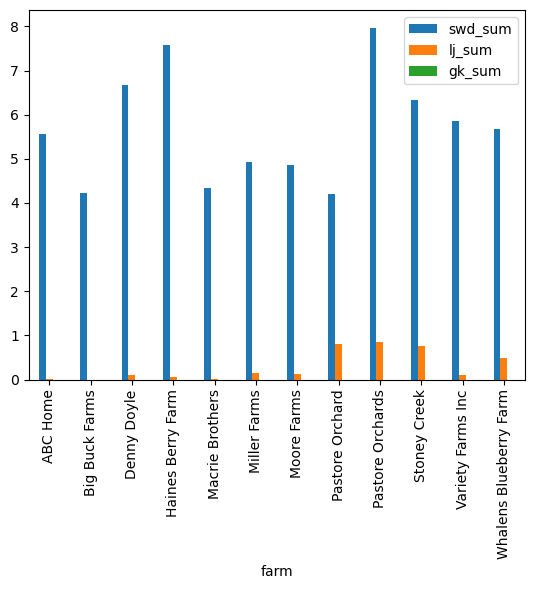

In [196]:
swd_nj.groupby(by = "farm")[['swd_sum', 'lj_sum', 'gk_sum']].mean().plot(kind = "bar")


<Axes: xlabel='swd_sum', ylabel='lj_sum'>

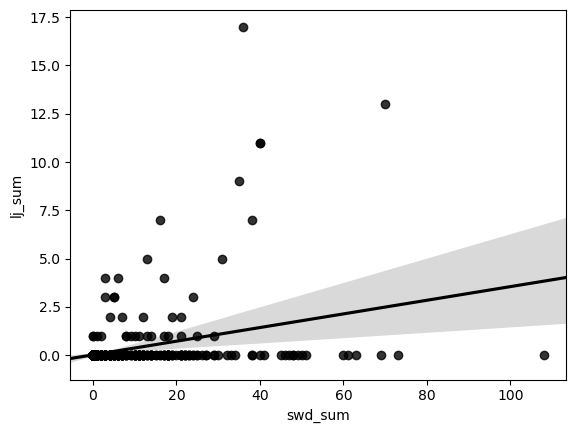

In [197]:
sns.regplot(
    data=swd_nj, x="swd_sum", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [198]:
swd_nj_dropped = swd_nj.dropna(subset = ['swd_sum', 'lj_sum'])
stats.pearsonr(swd_nj_dropped['swd_sum'], swd_nj_dropped['lj_sum'])

PearsonRResult(statistic=0.32668758048904584, pvalue=4.6449413622488544e-17)

<Axes: xlabel='forest_prop', ylabel='lj_sum'>

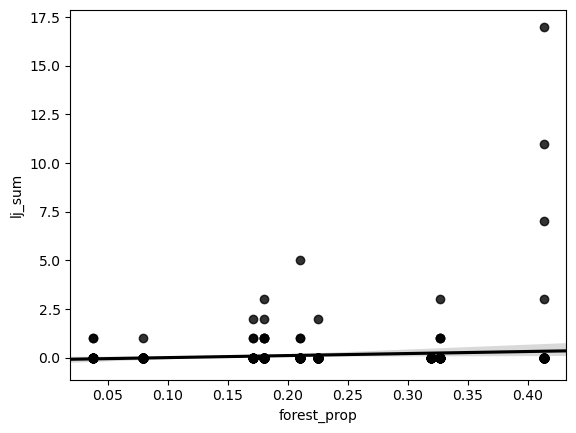

In [199]:
sns.regplot(
    data=swd_nj, x="forest_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [200]:
swd_nj_dropped = swd_nj.dropna(subset = ['forest_prop', 'lj_sum'])
stats.pearsonr(swd_nj_dropped['forest_prop'], swd_nj_dropped['lj_sum'])

PearsonRResult(statistic=0.11907717578148186, pvalue=0.005379054601289334)

# Maine

In [162]:
swd_me = pd.read_csv('Data/swd_me.csv')
swd_me = clean_columns(swd_me)
swd_me["collection_date"] = pd.to_datetime(swd_me["collection_date"], format='mixed')

swd_me

,state_province,lab_group_e_g_fanning,site_location_latitude,site_location_longitude,site_name_e_g_farm_or_how_you_identify_this_site,collection_date,sample_type,hosts,ganaspis_kimorum_present,total_ganaspis_kimorum_in_the_sample,leptopilina_japonica_present,total_leptopilina_japonica_in_the_sample,habitat_fruit_where_gb_or_lj_detected_ie_wooded_riparian,further_details_e_g_gb_found_100_m_from_release_or_describe_sentinel_trap_mass_fruit_collected_g,timing_of_when_sample_was_taken,type_of_fruit_s_collected_or_used_in_sentinel,other_species_present_e_g_4_asobara
0,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-09,Fruit Collection,25,No,0,Yes,7,Field edge,14.7,Pre-release,Wild Raspberry,No
1,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,4,No,0,No,0,Field edge,31,Pre-release,Lowbush Blueberry,No
2,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,No,0,1m into field,94.6,Pre-release,Lowbush Blueberry,No
3,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,No,0,10m into field,95.1,Pre-release,Lowbush Blueberry,1 R. mendax parasitoid
4,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,No,0,25m into field,93.3,Pre-release,Lowbush Blueberry,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Maine,Fanning,44.625803,-67.935629,INT,2023-08-11,Fruit Collection,na,No,0,No,0,Field edge,23.6g fruit,Post-release,Bunchberry,No
183,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Fruit Collection,na,No,0,No,0,Field edge,13.6g fruit,Pre-release,Bunchberry,No
184,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Sentinel,na,No,0,No,0,Field edge,6 traps baited with 33g SWD infested blueberry,Pre-release,Blueberry,No
185,Maine,Fanning,44.625803,-67.935629,INT,2023-08-23,Sentinel,na,No,0,No,0,Field edge,6 traps baited with 33g SWD infested blueberry,Pre-release,Blueberry,No


In [163]:
me_sites = {"ME_2022_1":"M1", 
            "ME_2022_2":"M2",
            "ME_2022_3":"M3",
            "ME_2022_4":"M4",
            "ME_2023_2":"M5",
            "ME_2023_4":"M6", 
            "ME_2023_5":"M7",
            "TT":"M8",
            "L&F":"M9",
            "FF":"M10",
            "CN":"M11", 
            "TTDL":"M12",
            "RHDL":"M13",
            "RHT":"M14",
            "TTDL":"M15",
            "LHFB":"M16", 
            "RHDL":"M17",
            "RH":"M18",
            "RH":"M19",
            "TTDL":"M20",
            "FFDL":"M21",
            "Goss":"M22",
            "Fairwinds":"M23",
            "ME_2023_1":"M1",
            "ME_2023_3":"M4",
            "CHH":"M1",
            "INT":"M4"}

In [164]:
swd_me['site_code'] = swd_me['site_name_e_g_farm_or_how_you_identify_this_site'].map(me_sites).fillna('')
swd_me

,state_province,lab_group_e_g_fanning,site_location_latitude,site_location_longitude,site_name_e_g_farm_or_how_you_identify_this_site,collection_date,sample_type,hosts,ganaspis_kimorum_present,total_ganaspis_kimorum_in_the_sample,leptopilina_japonica_present,total_leptopilina_japonica_in_the_sample,habitat_fruit_where_gb_or_lj_detected_ie_wooded_riparian,further_details_e_g_gb_found_100_m_from_release_or_describe_sentinel_trap_mass_fruit_collected_g,timing_of_when_sample_was_taken,type_of_fruit_s_collected_or_used_in_sentinel,other_species_present_e_g_4_asobara,site_code
0,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-09,Fruit Collection,25,No,0,Yes,7,Field edge,14.7,Pre-release,Wild Raspberry,No,M9
1,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,4,No,0,No,0,Field edge,31,Pre-release,Lowbush Blueberry,No,M9
2,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,No,0,1m into field,94.6,Pre-release,Lowbush Blueberry,No,M9
3,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,No,0,10m into field,95.1,Pre-release,Lowbush Blueberry,1 R. mendax parasitoid,M9
4,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,No,0,25m into field,93.3,Pre-release,Lowbush Blueberry,No,M9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Maine,Fanning,44.625803,-67.935629,INT,2023-08-11,Fruit Collection,na,No,0,No,0,Field edge,23.6g fruit,Post-release,Bunchberry,No,M4
183,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Fruit Collection,na,No,0,No,0,Field edge,13.6g fruit,Pre-release,Bunchberry,No,M4
184,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Sentinel,na,No,0,No,0,Field edge,6 traps baited with 33g SWD infested blueberry,Pre-release,Blueberry,No,M4
185,Maine,Fanning,44.625803,-67.935629,INT,2023-08-23,Sentinel,na,No,0,No,0,Field edge,6 traps baited with 33g SWD infested blueberry,Pre-release,Blueberry,No,M4


In [165]:
cdl_me = pd.read_csv('Landscape/CDL/2023_me_cdl_500m.csv')
cdl_me = clean_columns(cdl_me)
cdl_me

,unnamed_0,name,value_0,corn,oats,alfalfa,other_hay_non_alfalfa,fallow_idle_cropland,apples,open_water,...,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer
0,0,M1,0,0,0,0,4,1,0,8,...,0.324036,12,0.007122,6,0.003561,8,0.004748,0.313947,0.331157,500
1,1,M2,1,0,0,0,27,1,0,7,...,0.647647,138,0.081176,311,0.182941,7,0.004118,0.555294,0.728824,500
2,2,M3,0,1,0,0,74,0,0,0,...,0.838879,29,0.016929,88,0.051372,0,0.000000,0.838879,0.855809,500
3,3,M4,0,0,0,0,3,0,0,0,...,0.766181,13,0.007580,154,0.089796,0,0.000000,0.748688,0.773761,500
4,4,M5,0,4,0,1,0,1,0,128,...,0.549645,3,0.001773,68,0.040189,128,0.075650,0.532506,0.551418,500
5,5,M6,0,4,0,0,89,2,0,216,...,0.526627,111,0.065680,105,0.062130,216,0.127811,0.375740,0.592308,500
6,6,M7,0,3,0,0,74,0,0,0,...,0.607797,135,0.079740,171,0.101004,0,0.000000,0.561134,0.687537,500
7,7,M8,0,0,0,0,1,13,0,0,...,0.750000,8,0.004728,23,0.013593,0,0.000000,0.732270,0.754728,500
8,8,M9,0,0,0,0,140,2,0,0,...,0.663095,196,0.116667,183,0.108929,0,0.000000,0.624405,0.779762,500
9,9,M10,0,0,0,0,66,0,1,0,...,0.715051,331,0.196907,48,0.028554,0,0.000000,0.694825,0.911957,500


In [166]:
swd_me = pd.merge(swd_me, cdl_me, how='left', left_on='site_code', right_on='name')
swd_me

,state_province,lab_group_e_g_fanning,site_location_latitude,site_location_longitude,site_name_e_g_farm_or_how_you_identify_this_site,collection_date,sample_type,hosts,ganaspis_kimorum_present,total_ganaspis_kimorum_in_the_sample,...,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer
0,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-09,Fruit Collection,25,No,0,...,0.663095,196.0,0.116667,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0
1,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,4,No,0,...,0.663095,196.0,0.116667,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0
2,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,...,0.663095,196.0,0.116667,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0
3,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,...,0.663095,196.0,0.116667,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0
4,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,...,0.663095,196.0,0.116667,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Maine,Fanning,44.625803,-67.935629,INT,2023-08-11,Fruit Collection,na,No,0,...,0.766181,13.0,0.007580,154.0,0.089796,0.0,0.0,0.748688,0.773761,500.0
183,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Fruit Collection,na,No,0,...,0.766181,13.0,0.007580,154.0,0.089796,0.0,0.0,0.748688,0.773761,500.0
184,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Sentinel,na,No,0,...,0.766181,13.0,0.007580,154.0,0.089796,0.0,0.0,0.748688,0.773761,500.0
185,Maine,Fanning,44.625803,-67.935629,INT,2023-08-23,Sentinel,na,No,0,...,0.766181,13.0,0.007580,154.0,0.089796,0.0,0.0,0.748688,0.773761,500.0


In [167]:
swd_me['swd_sum'] = swd_me['hosts']
swd_me[['swd_sum']] = swd_me[['swd_sum']].apply(pd.to_numeric, errors='coerce')
swd_me['lj_sum'] = swd_me['total_leptopilina_japonica_in_the_sample'] 
swd_me['gk_sum'] = swd_me['total_ganaspis_kimorum_in_the_sample']
#swd_me = swd_me.dropna(subset = ['swd_sum', 'lj_sum','forest_prop'])
swd_me

,state_province,lab_group_e_g_fanning,site_location_latitude,site_location_longitude,site_name_e_g_farm_or_how_you_identify_this_site,collection_date,sample_type,hosts,ganaspis_kimorum_present,total_ganaspis_kimorum_in_the_sample,...,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum
0,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-09,Fruit Collection,25,No,0,...,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0,25.0,7,0
1,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,4,No,0,...,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0,4.0,0,0
2,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,...,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0,0.0,0,0
3,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,...,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0,0.0,0,0
4,Maine,Fanning,44.111895,-69.703734,L&F,2024-07-16,Fruit Collection,0,No,0,...,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Maine,Fanning,44.625803,-67.935629,INT,2023-08-11,Fruit Collection,na,No,0,...,154.0,0.089796,0.0,0.0,0.748688,0.773761,500.0,NaN,0,0
183,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Fruit Collection,na,No,0,...,154.0,0.089796,0.0,0.0,0.748688,0.773761,500.0,NaN,0,0
184,Maine,Fanning,44.625803,-67.935629,INT,2023-07-26,Sentinel,na,No,0,...,154.0,0.089796,0.0,0.0,0.748688,0.773761,500.0,NaN,0,0
185,Maine,Fanning,44.625803,-67.935629,INT,2023-08-23,Sentinel,na,No,0,...,154.0,0.089796,0.0,0.0,0.748688,0.773761,500.0,NaN,0,0


<Axes: xlabel='site_name_e_g_farm_or_how_you_identify_this_site'>

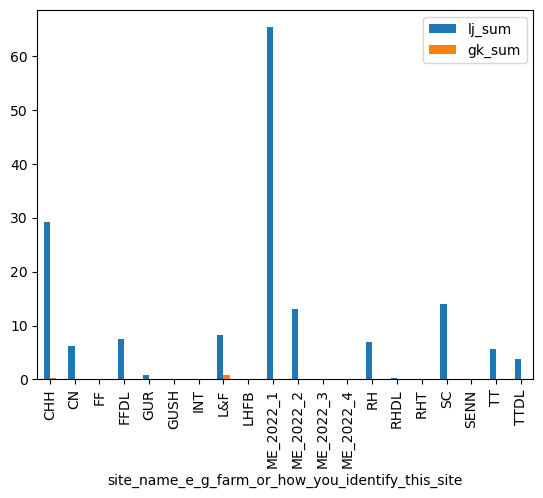

In [168]:
swd_me.groupby(by = "site_name_e_g_farm_or_how_you_identify_this_site")[['lj_sum', 'gk_sum']].mean().plot(kind = "bar")


<Axes: xlabel='swd_sum', ylabel='lj_sum'>

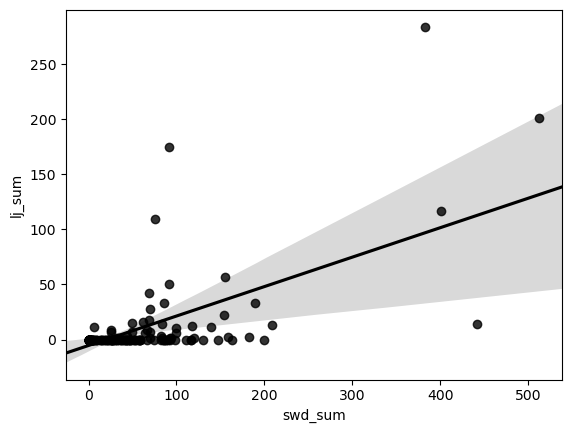

In [169]:
sns.regplot(
    data=swd_me, x="swd_sum", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black")

In [171]:
swd_me_dropped = swd_me.dropna(subset = ['swd_sum', 'lj_sum'])
stats.pearsonr(swd_me_dropped['swd_sum'], swd_me_dropped['lj_sum'])

PearsonRResult(statistic=0.6322246295930587, pvalue=2.951280834060262e-21)

<Axes: xlabel='forest_prop', ylabel='lj_sum'>

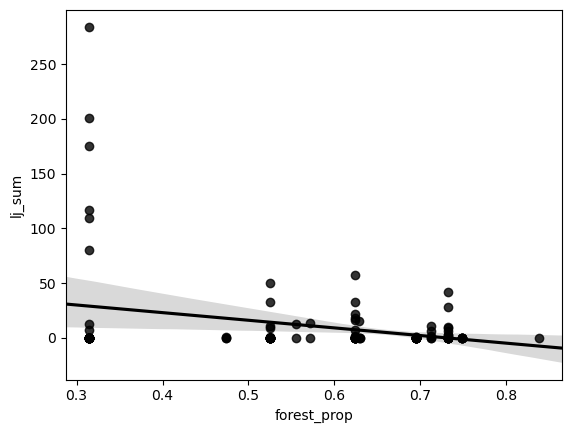

In [172]:
sns.regplot(
    data=swd_me, x="forest_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [174]:
swd_me_dropped = swd_me.dropna(subset = ['forest_prop', 'lj_sum'])
stats.pearsonr(swd_me_dropped['forest_prop'], swd_me_dropped['lj_sum'])

PearsonRResult(statistic=-0.2913096960869401, pvalue=0.0011879686456626897)

# Combined

In [201]:
swd_me_subset = swd_me[['site_name_e_g_farm_or_how_you_identify_this_site', 'collection_date', 'type_of_fruit_s_collected_or_used_in_sentinel', 
                        'name', 'ag', 'ag_prop', 'nat', 'nat_prop', 'semi_nat',
                        'semi_nat_prop', 'dev', 'dev_prop', 'other', 'other_prop',
                        'forest_prop', 'total_nat_prop', 'buffer', 'lj_sum', 'gk_sum', 'swd_sum']]

swd_me_subset = swd_me_subset.rename(columns={"site_name_e_g_farm_or_how_you_identify_this_site": "farm", "type_of_fruit_s_collected_or_used_in_sentinel": "host_plant"})

swd_me_subset

,farm,collection_date,host_plant,name,ag,ag_prop,nat,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,lj_sum,gk_sum,swd_sum
0,L&F,2024-07-09,Wild Raspberry,M9,45.0,0.026786,1114.0,0.663095,196.0,0.116667,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0,7,0,25.0
1,L&F,2024-07-16,Lowbush Blueberry,M9,45.0,0.026786,1114.0,0.663095,196.0,0.116667,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0,0,0,4.0
2,L&F,2024-07-16,Lowbush Blueberry,M9,45.0,0.026786,1114.0,0.663095,196.0,0.116667,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0,0,0,0.0
3,L&F,2024-07-16,Lowbush Blueberry,M9,45.0,0.026786,1114.0,0.663095,196.0,0.116667,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0,0,0,0.0
4,L&F,2024-07-16,Lowbush Blueberry,M9,45.0,0.026786,1114.0,0.663095,196.0,0.116667,183.0,0.108929,0.0,0.0,0.624405,0.779762,500.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,INT,2023-08-11,Bunchberry,M4,231.0,0.134694,1314.0,0.766181,13.0,0.007580,154.0,0.089796,0.0,0.0,0.748688,0.773761,500.0,0,0,NaN
183,INT,2023-07-26,Bunchberry,M4,231.0,0.134694,1314.0,0.766181,13.0,0.007580,154.0,0.089796,0.0,0.0,0.748688,0.773761,500.0,0,0,NaN
184,INT,2023-07-26,Blueberry,M4,231.0,0.134694,1314.0,0.766181,13.0,0.007580,154.0,0.089796,0.0,0.0,0.748688,0.773761,500.0,0,0,NaN
185,INT,2023-08-23,Blueberry,M4,231.0,0.134694,1314.0,0.766181,13.0,0.007580,154.0,0.089796,0.0,0.0,0.748688,0.773761,500.0,0,0,NaN


In [202]:
swd_nj_subset = swd_nj[['collection_date', 'farm', 'name', 'host_plant', 'ag', 'ag_prop', 'nat',
       'nat_prop', 'semi_nat', 'semi_nat_prop', 'dev', 'dev_prop', 'other',
       'other_prop', 'forest_prop', 'total_nat_prop', 'buffer', 'swd_sum',
       'lj_sum', 'gk_sum']]

swd_nj_subset

,collection_date,farm,name,host_plant,ag,ag_prop,nat,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum
0,2024-06-11,Denny Doyle,J4,Highbush Blueberry,127.0,0.086043,1254.0,0.849593,16.0,0.010840,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0,0,0,0
1,2024-06-11,Denny Doyle,J4,Highbush Blueberry,127.0,0.086043,1254.0,0.849593,16.0,0.010840,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0,0,0,0
2,2024-06-11,Denny Doyle,J4,Highbush Blueberry,127.0,0.086043,1254.0,0.849593,16.0,0.010840,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0,0,0,0
3,2024-06-12,Haines Berry Farm,J8,Highbush Blueberry,311.0,0.210419,1013.0,0.685386,8.0,0.005413,35.0,0.023681,110.0,0.074425,0.037889,0.690798,500.0,0,0,0
4,2024-06-12,Haines Berry Farm,J8,Highbush Blueberry,311.0,0.210419,1013.0,0.685386,8.0,0.005413,35.0,0.023681,110.0,0.074425,0.037889,0.690798,500.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2024-10-24,Macrie Brothers,J5,Cranberry,246.0,0.168724,1018.0,0.698217,10.0,0.006859,180.0,0.123457,3.0,0.002058,0.225652,0.705075,500.0,0,0,0
623,2024-10-24,Macrie Brothers,J5,Pokeweed,246.0,0.168724,1018.0,0.698217,10.0,0.006859,180.0,0.123457,3.0,0.002058,0.225652,0.705075,500.0,0,0,0
624,2024-10-24,Moore Farms,J2,Wintergreen,290.0,0.197682,960.0,0.654397,7.0,0.004772,132.0,0.089980,95.0,0.064758,0.209952,0.659168,500.0,0,0,0
625,2024-10-24,Moore Farms,J2,Inkberry,290.0,0.197682,960.0,0.654397,7.0,0.004772,132.0,0.089980,95.0,0.064758,0.209952,0.659168,500.0,0,0,0


In [203]:
swd_ny_subset = swd_ny[['collection_date', 'site', 'name', 'fruit', 'ag', 'ag_prop', 'nat',
       'nat_prop', 'semi_nat', 'semi_nat_prop', 'dev', 'dev_prop', 'other',
       'other_prop', 'forest_prop', 'total_nat_prop', 'buffer', 'swd_sum',
       'lj_sum', 'gk_sum']]

swd_ny_subset = swd_ny_subset.rename(columns={"site": "farm", "fruit": "host_plant"})

swd_ny_subset

,collection_date,farm,name,host_plant,ag,ag_prop,nat,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum
0,2024-06-26,Abbott,Y2,Blueberry,978,0.601846,210,0.129231,287,0.176615,130,0.080000,0,0.000000,0.107077,0.305846,500,0.0,0,0
1,2024-06-26,Abbott,Y2,Honey suckle,978,0.601846,210,0.129231,287,0.176615,130,0.080000,0,0.000000,0.107077,0.305846,500,0.0,0,0
2,2024-07-25,Abbott,Y2,Blueberry,978,0.601846,210,0.129231,287,0.176615,130,0.080000,0,0.000000,0.107077,0.305846,500,154.0,0,0
3,2024-07-25,Abbott,Y2,Honey suckle,978,0.601846,210,0.129231,287,0.176615,130,0.080000,0,0.000000,0.107077,0.305846,500,610.0,3,0
4,2024-09-04,Abbott,Y2,Buckthorn,978,0.601846,210,0.129231,287,0.176615,130,0.080000,0,0.000000,0.107077,0.305846,500,29.0,3,2
5,2024-06-26,Berry Patch,Y5,Bush Cherry,238,0.148843,669,0.418386,519,0.324578,132,0.082552,1,0.000625,0.333959,0.742964,500,26.0,9,0
6,2024-06-26,Berry Patch,Y5,Service Berry,238,0.148843,669,0.418386,519,0.324578,132,0.082552,1,0.000625,0.333959,0.742964,500,294.0,1,0
7,2024-07-25,Berry Patch,Y5,Honeysuckle,238,0.148843,669,0.418386,519,0.324578,132,0.082552,1,0.000625,0.333959,0.742964,500,214.0,109,0
8,2024-06-26,Emmi,Y3,Blueberry,476,0.292204,555,0.340700,374,0.229589,189,0.116022,0,0.000000,0.291590,0.570289,500,0.0,0,0
9,2024-06-26,Emmi,Y3,Honeysuckle,476,0.292204,555,0.340700,374,0.229589,189,0.116022,0,0.000000,0.291590,0.570289,500,17.0,0,0


In [204]:
combined_subset = pd.concat([swd_nj_subset, swd_me_subset, swd_ny_subset], axis=0)
combined_subset

,collection_date,farm,name,host_plant,ag,ag_prop,nat,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum
0,2024-06-11,Denny Doyle,J4,Highbush Blueberry,127.0,0.086043,1254.0,0.849593,16.0,0.010840,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0,0.0,0,0
1,2024-06-11,Denny Doyle,J4,Highbush Blueberry,127.0,0.086043,1254.0,0.849593,16.0,0.010840,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0,0.0,0,0
2,2024-06-11,Denny Doyle,J4,Highbush Blueberry,127.0,0.086043,1254.0,0.849593,16.0,0.010840,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0,0.0,0,0
3,2024-06-12,Haines Berry Farm,J8,Highbush Blueberry,311.0,0.210419,1013.0,0.685386,8.0,0.005413,35.0,0.023681,110.0,0.074425,0.037889,0.690798,500.0,0.0,0,0
4,2024-06-12,Haines Berry Farm,J8,Highbush Blueberry,311.0,0.210419,1013.0,0.685386,8.0,0.005413,35.0,0.023681,110.0,0.074425,0.037889,0.690798,500.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-09-20,Emmi,Y3,Sentinel,476.0,0.292204,555.0,0.340700,374.0,0.229589,189.0,0.116022,0.0,0.000000,0.291590,0.570289,500.0,51.0,13,0
57,2022-09-20,G&S Orchards,Y4,Sentinel,394.0,0.242015,386.0,0.237101,668.0,0.410319,40.0,0.024570,0.0,0.000000,0.153563,0.647420,500.0,18.0,32,0
58,2022-09-20,Pre Emption,Y1,Buckthorn,1285.0,0.798633,251.0,0.155998,63.0,0.039155,6.0,0.003729,0.0,0.000000,0.137974,0.195152,500.0,1.0,0,0
59,2022-09-20,Abbott,Y2,Buckthorn,978.0,0.601846,210.0,0.129231,287.0,0.176615,130.0,0.080000,0.0,0.000000,0.107077,0.305846,500.0,27.0,12,1


<Axes: xlabel='swd_sum', ylabel='lj_sum'>

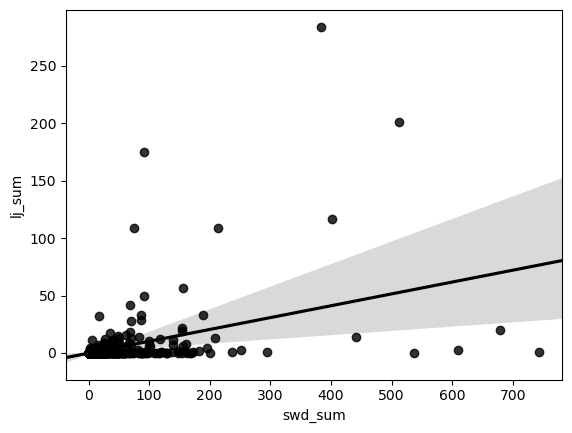

In [210]:
sns.regplot(
    data=combined_subset, x="swd_sum", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [211]:
combined_subset_dropped = combined_subset.dropna(subset = ['swd_sum', 'lj_sum'])
stats.pearsonr(combined_subset_dropped['swd_sum'], combined_subset_dropped['lj_sum'])

PearsonRResult(statistic=0.424351782286233, pvalue=3.958143705903925e-39)

<Axes: xlabel='forest_prop', ylabel='lj_sum'>

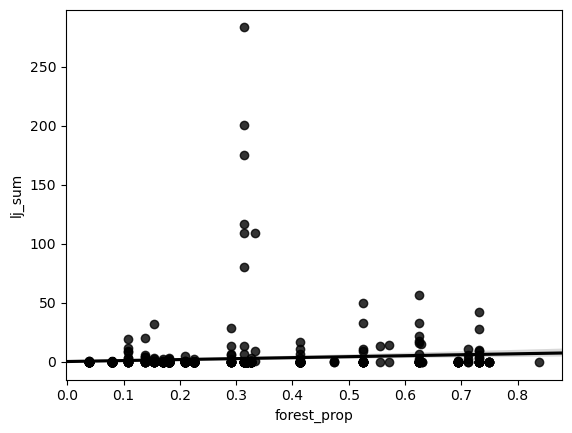

In [205]:
sns.regplot(
    data=combined_subset, x="forest_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [209]:
combined_subset_dropped = combined_subset.dropna(subset = ['forest_prop', 'lj_sum'])
stats.pearsonr(combined_subset_dropped['forest_prop'], combined_subset_dropped['lj_sum'])

PearsonRResult(statistic=0.08615197889516442, pvalue=0.020252861984180186)

<Axes: xlabel='ag_prop', ylabel='lj_sum'>

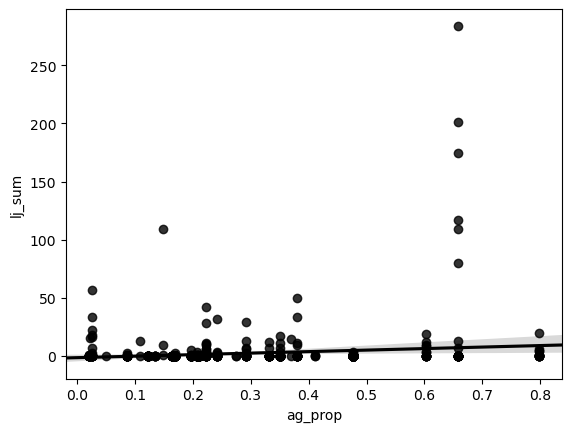

In [170]:
sns.regplot(
    data=combined_subset, x="ag_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [169]:
stats.pearsonr(combined_subset['ag_prop'], combined_subset['lj_sum'])

PearsonRResult(statistic=0.14016495028210674, pvalue=7.640417538472699e-05)

<Axes: xlabel='nat_prop', ylabel='lj_sum'>

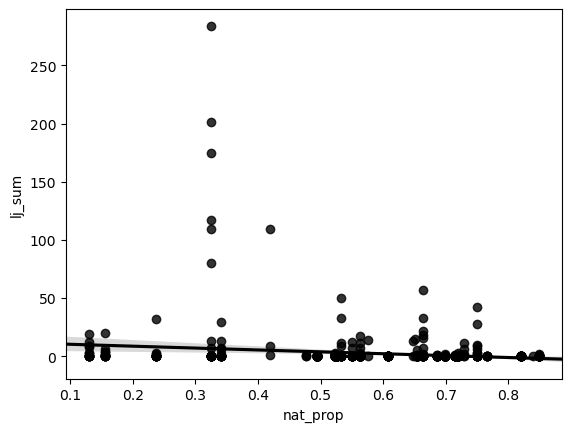

In [188]:
sns.regplot(
    data=combined_subset, x="nat_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [171]:
stats.pearsonr(combined_subset['nat_prop'], combined_subset['lj_sum'])

PearsonRResult(statistic=-0.15809376297478536, pvalue=7.916298348918948e-06)

<Axes: xlabel='nat_prop', ylabel='forest_prop'>

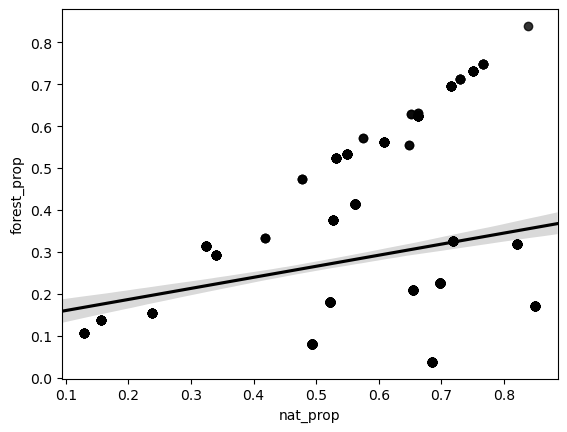

In [173]:
sns.regplot(
    data=combined_subset, x="nat_prop", y="forest_prop",
    scatter=True, truncate=False, order=1, color="black",
)

In [176]:
subset_2024 = combined_subset[combined_subset['collection_date'].dt.year == 2024]
subset_2024

,collection_date,farm,name,host_plant,ag,ag_prop,nat,nat_prop,semi_nat,semi_nat_prop,dev,dev_prop,other,other_prop,forest_prop,total_nat_prop,buffer,swd_sum,lj_sum,gk_sum
0,2024-06-11,Denny Doyle,J4,Highbush Blueberry,127.0,0.086043,1254.0,0.849593,16.0,0.010840,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0,0.0,0,0
1,2024-06-11,Denny Doyle,J4,Highbush Blueberry,127.0,0.086043,1254.0,0.849593,16.0,0.010840,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0,0.0,0,0
2,2024-06-11,Denny Doyle,J4,Highbush Blueberry,127.0,0.086043,1254.0,0.849593,16.0,0.010840,85.0,0.057588,1.0,0.000678,0.170732,0.860434,500.0,0.0,0,0
3,2024-06-12,Haines Berry Farm,J8,Highbush Blueberry,311.0,0.210419,1013.0,0.685386,8.0,0.005413,35.0,0.023681,110.0,0.074425,0.037889,0.690798,500.0,0.0,0,0
4,2024-06-12,Haines Berry Farm,J8,Highbush Blueberry,311.0,0.210419,1013.0,0.685386,8.0,0.005413,35.0,0.023681,110.0,0.074425,0.037889,0.690798,500.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,2024-06-26,Pre Emption,Y1,Blueberry,1285.0,0.798633,251.0,0.155998,63.0,0.039155,6.0,0.003729,0.0,0.000000,0.137974,0.195152,500.0,3.0,0,0
21,2024-06-26,Pre Emption,Y1,Honeysuckle,1285.0,0.798633,251.0,0.155998,63.0,0.039155,6.0,0.003729,0.0,0.000000,0.137974,0.195152,500.0,8.0,0,0
23,2024-07-25,Pre Emption,Y1,Blueberry,1285.0,0.798633,251.0,0.155998,63.0,0.039155,6.0,0.003729,0.0,0.000000,0.137974,0.195152,500.0,744.0,1,0
24,2024-09-04,Pre Emption,Y1,Buckthorn,1285.0,0.798633,251.0,0.155998,63.0,0.039155,6.0,0.003729,0.0,0.000000,0.137974,0.195152,500.0,11.0,4,0


<Axes: xlabel='forest_prop', ylabel='lj_sum'>

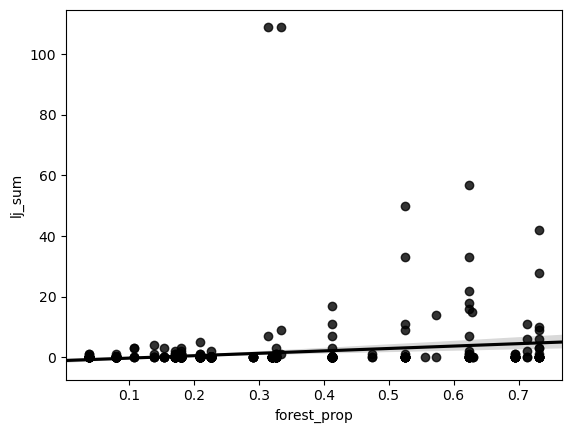

In [177]:
sns.regplot(
    data=subset_2024, x="forest_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [178]:
stats.pearsonr(subset_2024['forest_prop'], subset_2024['lj_sum'])

PearsonRResult(statistic=0.18944120676081252, pvalue=1.0427786979101188e-06)

<Axes: xlabel='forest_prop', ylabel='gk_sum'>

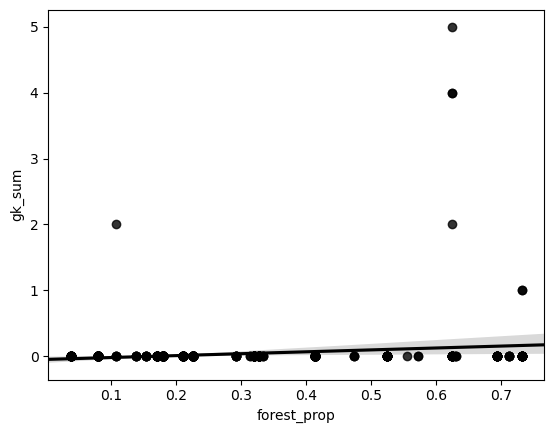

In [185]:
sns.regplot(
    data=subset_2024, x="forest_prop", y="gk_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [186]:
stats.pearsonr(subset_2024['forest_prop'], subset_2024['gk_sum'])

PearsonRResult(statistic=0.16077202080701553, pvalue=3.569801072688795e-05)

<Axes: xlabel='ag_prop', ylabel='lj_sum'>

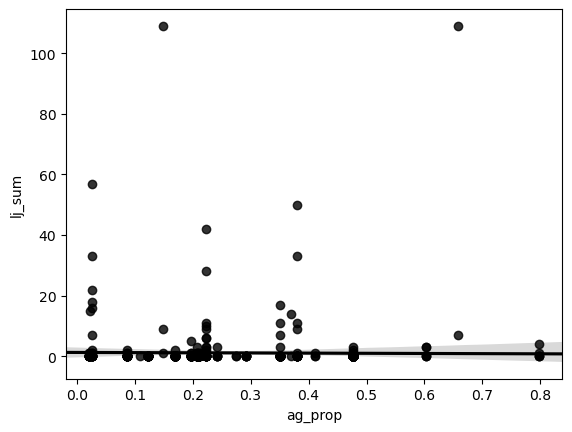

In [179]:
sns.regplot(
    data=subset_2024, x="ag_prop", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [180]:
stats.pearsonr(subset_2024['ag_prop'], subset_2024['lj_sum'])

PearsonRResult(statistic=-0.01201313006884805, pvalue=0.758938161849782)

<Axes: xlabel='swd_sum', ylabel='lj_sum'>

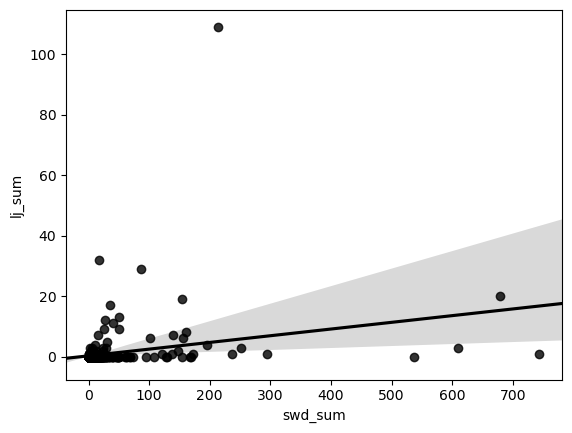

In [181]:
sns.regplot(
    data=combined_subset, x="swd_sum", y="lj_sum",
    scatter=True, truncate=False, order=1, color="black",
)

In [184]:
subset_2024_temp = subset_2024.dropna(subset = ['swd_sum', 'lj_sum', 'gk_sum', 'forest_prop'])
stats.pearsonr(subset_2024_temp['swd_sum'], subset_2024_temp['lj_sum'])

PearsonRResult(statistic=0.2202095696062485, pvalue=1.0889180761036304e-07)

In [187]:
subset_2024.to_csv('Data/subset_2024.csv')